In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

import pandas as pd
from datetime import datetime, timedelta

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import mysql.connector

from scipy.signal import savgol_filter   # smooth the data

#plt.style.use('seaborn-white')
plt.style.use('seaborn-white')

In [2]:
pdr=pd.read_csv('/Users/gurajas/Google Drive/Work shop/Station1/pdr_1.csv')
grimm=pd.read_csv('/Users/gurajas/Google Drive/Work shop/Station1/grimm1.csv')
cpc=pd.read_csv('/Users/gurajas/Google Drive/Work shop/Station1/CPC2.csv')

In [3]:
pdr.columns = ["pm2.5","Temp","RH","AP","Flag","Time","Date"]
pdr.head()

,pm2.5,Temp,RH,AP,Flag,Time,Date
0,7.94,20.1,62,752,0,14:11:59,2-Aug-19
1,6.02,20.1,62,754,0,14:12:00,2-Aug-19
2,6.17,20.1,62,754,0,14:12:01,2-Aug-19
3,5.72,20.1,62,754,0,14:12:02,2-Aug-19
4,4.80,20.1,62,754,0,14:12:03,2-Aug-19


In [4]:
pdr["Date"] = pd.to_datetime(pdr["Date"])
pdr["Time"] = pd.to_timedelta(pdr["Time"])
pdr["DateTime"] = pdr["Date"] + pdr["Time"]
#pdr["DateTime"] = pdr["DateTime"] + timedelta(hours=1,minutes=6)
pdr.head()

,pm2.5,Temp,RH,AP,Flag,Time,Date,DateTime
0,7.94,20.1,62,752,0,14:11:59,2019-08-02,2019-08-02 14:11:59
1,6.02,20.1,62,754,0,14:12:00,2019-08-02,2019-08-02 14:12:00
2,6.17,20.1,62,754,0,14:12:01,2019-08-02,2019-08-02 14:12:01
3,5.72,20.1,62,754,0,14:12:02,2019-08-02,2019-08-02 14:12:02
4,4.80,20.1,62,754,0,14:12:03,2019-08-02,2019-08-02 14:12:03


In [5]:
grimm.columns = ["DateTime","id","0.3","0.4","0.5","0.65","0.8","1.0","1.6","2","3","4","5","7.5","10","15","20","nan","pm2.5","pm10"]
cpc.columns = ["DateTime","id","pn"]

In [6]:
cpc=cpc.sort_values('id')
grimm=grimm.sort_values('id')


In [7]:
cpc['DateTime'] = pd.to_datetime(cpc['DateTime'])
grimm['DateTime'] = pd.to_datetime(grimm['DateTime'])




In [8]:
pdr.index=pdr['DateTime']
grimm.index=grimm['DateTime']
cpc.index=cpc['DateTime']

In [9]:
pdr=pdr['2019-08-02 16:22:01':'2019-08-02 21:21:00']
grimm=grimm['2019-08-02 16:22:01':'2019-08-02 21:01:00']
cpc=cpc['2019-08-02 16:22:01':'2019-08-02 21:21:00']

In [10]:
grimm['0.3n']=savgol_filter(grimm['0.3'], 97, 1)
grimm['pm2.5n']=savgol_filter(grimm['pm2.5'], 97, 1)
pdr['pm2.5n']=savgol_filter(pdr['pm2.5'], 97, 1)
cpc['pnn']=savgol_filter(cpc['pn'], 97, 1)


In [11]:
grimm.head()

,DateTime,id,0.3,0.4,0.5,0.65,0.8,1.0,1.6,2,...,5,7.5,10,15,20,nan,pm2.5,pm10,0.3n,pm2.5n
DateTime,,,,,,,,,,,,,,,,,,,,,
2019-08-02 16:22:08,2019-08-02 16:22:08,333,30343.0,6948.0,795.0,30.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,11.293207,11.293207,36797.778035,12.872333
2019-08-02 16:23:20,2019-08-02 16:23:20,334,40372.0,8532.0,885.0,20.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,14.627055,14.627055,36653.231972,12.832255
2019-08-02 16:23:44,2019-08-02 16:23:44,335,37900.0,8135.0,820.0,5.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,13.750631,13.750631,36508.685909,12.792177
2019-08-02 16:25:26,2019-08-02 16:25:26,336,44906.0,8959.0,880.0,20.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,16.006175,16.006175,36364.139846,12.752099
2019-08-02 16:26:26,2019-08-02 16:26:26,337,39086.0,7653.0,635.0,10.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,13.787142,13.787142,36219.593783,12.712021


/Users/gurajas/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


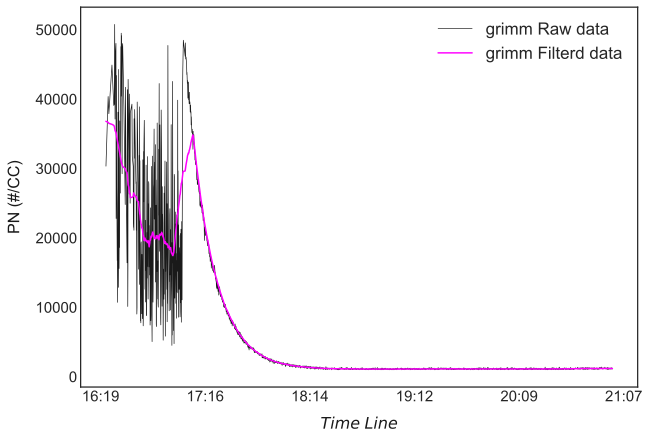

In [12]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax1.grid(False)


lns1=ax1.plot(grimm['DateTime'],grimm['0.3'], color='k',linewidth=0.7,label='grimm Raw data')
lns2=ax1.plot(grimm['DateTime'],grimm['0.3n'], color='magenta',linewidth=1.5,label='grimm Filterd data')




lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('PN (#/CC)',color='k',fontsize=16,labelpad=13)
#ax2.set_ylabel('PM 2.5 (ug/m3)',color='k',fontsize=16,labelpad=13)


ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)
#ax2.tick_params(axis = 'both', which = 'major', labelsize = 15)


for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
ax1.xaxis.set_major_locator(mticker.MaxNLocator(7))

#ax2.fill_between(cpc['DateTime'], cpc['pn'],color='magenta',alpha=.1)


myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)

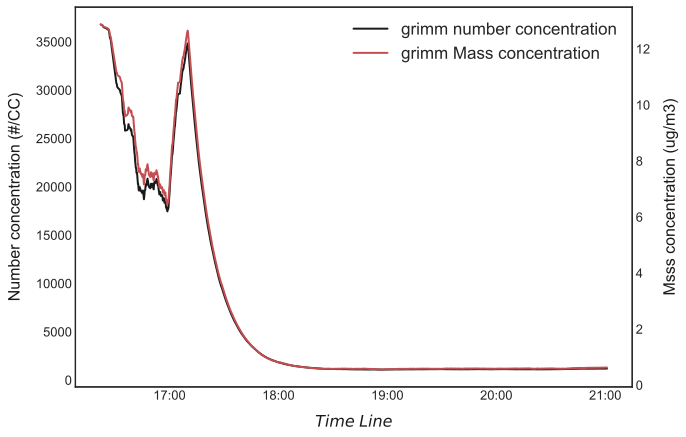

In [13]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax2=ax1.twinx()
ax1.grid(False)
ax2.grid(False)


lns1=ax1.plot(grimm['DateTime'],grimm['0.3n'], color='k',linewidth=2,label='grimm number concentration')
lns2=ax2.plot(grimm['DateTime'],grimm['pm2.5n'], color='r',linewidth=2,label='grimm Mass concentration')




lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('Number concentration (#/CC)',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('Msss concentration (ug/m3)',color='k',fontsize=16,labelpad=13)



ax1.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 13)


for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
#ax1.xaxis.set_major_locator(mticker.MaxNLocator(45))

#ax2.fill_between(grimm['DateTime'], grimm['0.3'],color='magenta',alpha=.5)



myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)

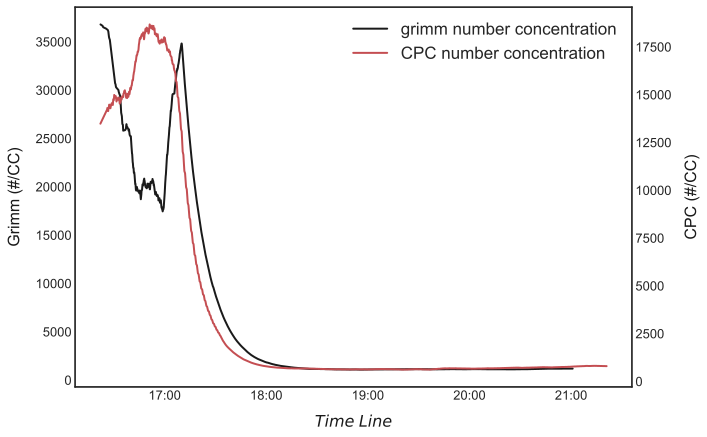

In [14]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax2=ax1.twinx()
ax1.grid(False)
ax2.grid(False)


lns1=ax1.plot(grimm['DateTime'],grimm['0.3n'], color='k',linewidth=2,label='grimm number concentration')
lns2=ax2.plot(cpc['DateTime'],cpc['pnn'], color='r',linewidth=2,label='CPC number concentration')




lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('Grimm (#/CC)',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('CPC (#/CC)',color='k',fontsize=16,labelpad=13)



ax1.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 13)


for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
#ax1.xaxis.set_major_locator(mticker.MaxNLocator(45))

#ax2.fill_between(grimm['DateTime'], grimm['0.3'],color='magenta',alpha=.5)



myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)

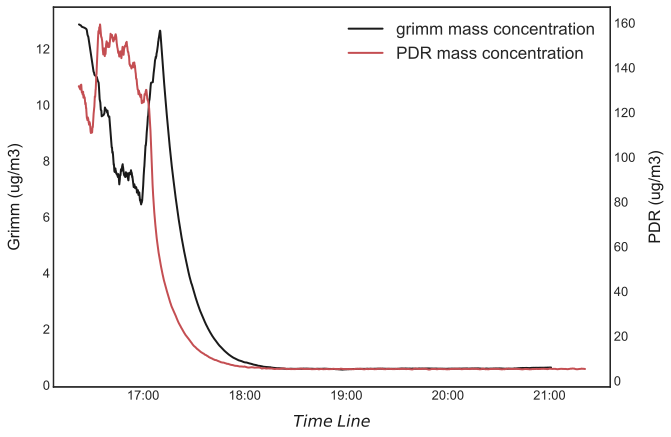

In [15]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax2=ax1.twinx()
ax1.grid(False)
ax2.grid(False)


lns1=ax1.plot(grimm['DateTime'],grimm['pm2.5n'], color='k',linewidth=2,label='grimm mass concentration')
lns2=ax2.plot(pdr['DateTime'],pdr['pm2.5n'], color='r',linewidth=2,label='PDR mass concentration')




lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='upper right',fontsize=17,markerscale=4)


ax1.set_xlabel('$Time$ $Line$',fontsize=16,color='k',labelpad=13)
ax1.set_ylabel('Grimm (ug/m3)',color='k',fontsize=16,labelpad=13)
ax2.set_ylabel('PDR (ug/m3)',color='k',fontsize=16,labelpad=13)



ax1.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 13)


for label in ax1.xaxis.get_ticklabels():
       label.set_rotation(0)
#ax1.xaxis.set_major_locator(mticker.MaxNLocator(45))

#ax2.fill_between(grimm['DateTime'], grimm['0.3'],color='magenta',alpha=.5)



myFmt = mdates.DateFormatter('%H:%M')
ax1.xaxis.set_major_formatter(myFmt)